In [1]:
!pip install -q pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.6/718.6 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 10.0 MB/s eta 0:00:00


In [2]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.8 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import transformers
import torch
import torchmetrics
import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.tuner import Tuner
from pytorch_lightning.callbacks import LearningRateMonitor, EarlyStopping, ModelCheckpoint

In [2]:
dev_pred = pd.read_csv("dev_pred.csv")
test_pred = pd.read_csv("test_pred.csv")

In [3]:
dev_pred.head()

,klue_rl_L1_0005_val_pearson=0.9341.pt,klue_rl_MSE_0001_val_pearson=0.9274.pt,klue_rl_L1_001_9288.pt,klue_rl_MSE_0007_val_pearson=0.9335.pt,snunlp_0004_val_pearson=0.9340.pt,snunlp_0015_val_pearson=0.9314.pt,snunlp_0011_val_pearson=0.9312.pt,snunlp_MSE_001_val_pearson=0.9316.pt,label
0,1.695715,1.434463,1.124548,1.869901,1.519959,1.602825,2.256165,2.017124,2.0
1,3.834317,3.990118,3.839239,3.678462,3.064890,3.382388,3.300652,3.397101,3.4
2,4.346141,4.788230,4.378584,4.077088,4.384234,4.512577,4.771413,4.626282,4.0
3,3.620099,3.796276,3.804714,3.755897,3.442171,3.459715,3.644906,3.794461,3.4
4,1.751315,1.962249,1.831401,1.981630,2.303679,2.461939,2.421927,2.370026,1.4


In [4]:
dev_pred.describe()

,klue_rl_L1_0005_val_pearson=0.9341.pt,klue_rl_MSE_0001_val_pearson=0.9274.pt,klue_rl_L1_001_9288.pt,klue_rl_MSE_0007_val_pearson=0.9335.pt,snunlp_0004_val_pearson=0.9340.pt,snunlp_0015_val_pearson=0.9314.pt,snunlp_0011_val_pearson=0.9312.pt,snunlp_MSE_001_val_pearson=0.9316.pt,label
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,2.719637,2.845774,2.679063,2.744879,2.717325,2.731712,2.927914,2.766382,2.584000
std,1.581751,1.534643,1.497293,1.566634,1.458104,1.514056,1.467114,1.616509,1.459483
min,-0.095366,0.101410,-0.108902,-0.009371,-0.019515,-0.027895,-0.063561,-0.130603,0.000000
25%,1.346120,1.473866,1.341475,1.374593,1.431153,1.447449,1.740002,1.287743,1.400000
50%,2.762288,2.867913,2.824065,2.840601,2.714539,2.775539,2.982087,2.793539,2.600000
75%,4.115534,4.198342,4.014717,4.134209,3.991592,4.045504,4.209026,4.205039,3.800000
max,5.308520,5.336750,5.174864,5.298960,5.254301,5.346727,5.417330,5.359127,5.000000


In [5]:
dev_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   klue_rl_L1_0005_val_pearson=0.9341.pt   550 non-null    float64
 1   klue_rl_MSE_0001_val_pearson=0.9274.pt  550 non-null    float64
 2   klue_rl_L1_001_9288.pt                  550 non-null    float64
 3   klue_rl_MSE_0007_val_pearson=0.9335.pt  550 non-null    float64
 4   snunlp_0004_val_pearson=0.9340.pt       550 non-null    float64
 5   snunlp_0015_val_pearson=0.9314.pt       550 non-null    float64
 6   snunlp_0011_val_pearson=0.9312.pt       550 non-null    float64
 7   snunlp_MSE_001_val_pearson=0.9316.pt    550 non-null    float64
 8   label                                   550 non-null    float64
dtypes: float64(9)
memory usage: 38.8 KB


In [6]:
cols = dev_pred.columns.tolist()

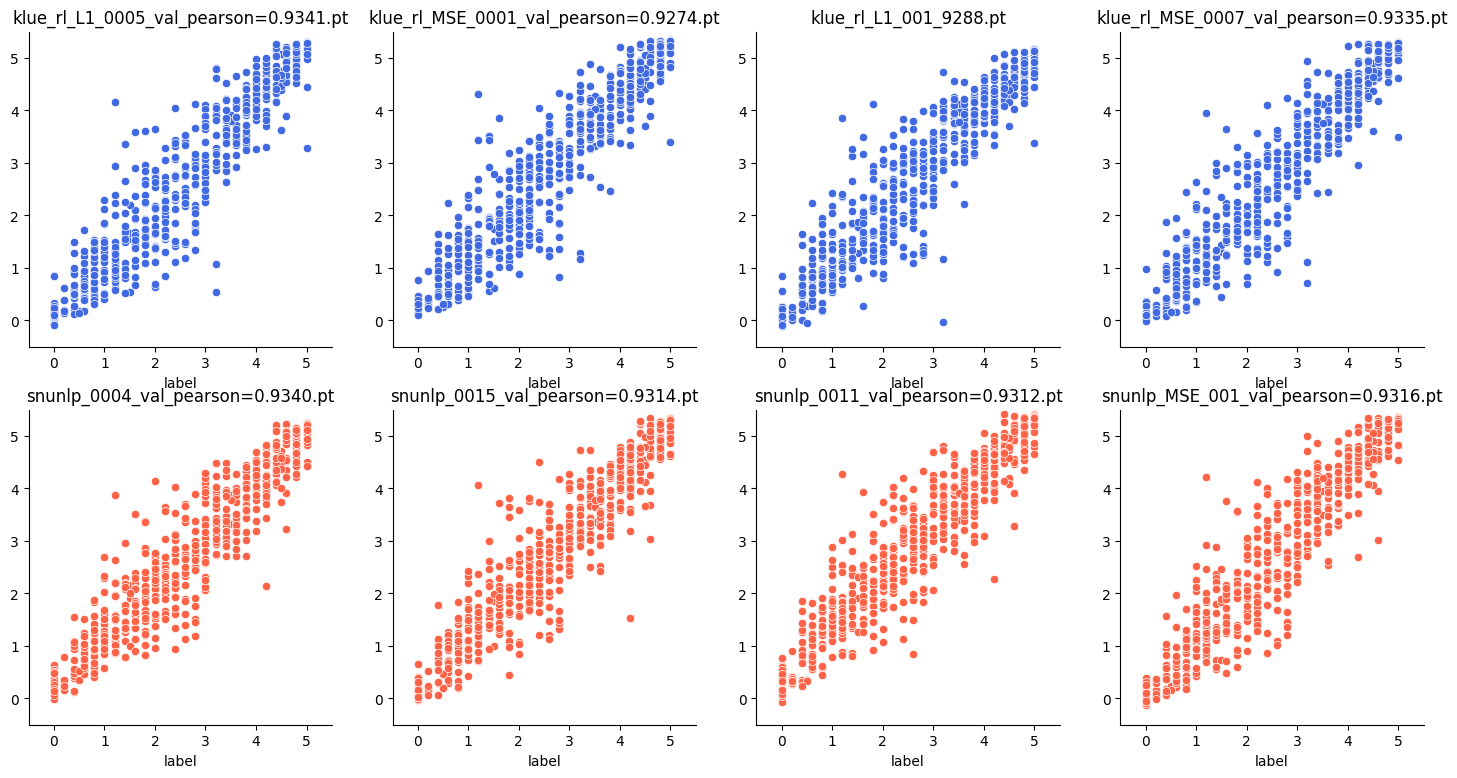

In [7]:
f, axes = plt.subplots(2, 4, figsize=(18, 9))
for i, candidate in enumerate(cols[:-1]):
    sns.scatterplot(dev_pred, x=dev_pred.label, y=dev_pred[candidate], color="tomato" if (i//4)%2 else "royalblue", ax = axes[i//4, i%4])
    axes[i//4, i%4].set_title(candidate)
    axes[i//4, i%4].set_ylim(-0.5, 5.5)
    axes[i//4, i%4].set_xlim(-0.5, 5.5)
    axes[i//4, i%4].set_ylabel("")
    for s in ['top', 'right']:
        axes[i//4, i%4].spines[s].set_visible(False)
plt.show()

In [8]:
dev_pred.drop('label', axis=1).values.tolist()

[[1.6957155,
  1.434463,
  1.1245484,
  1.8699011,
  1.519959,
  1.6028248,
  2.256165,
  2.017124],
 [3.834317,
  3.9901185,
  3.8392391,
  3.678462,
  3.06489,
  3.3823876,
  3.300652,
  3.397101],
 [4.346141,
  4.78823,
  4.3785844,
  4.0770884,
  4.384234,
  4.512577,
  4.7714133,
  4.626282],
 [3.6200993,
  3.7962756,
  3.804714,
  3.755897,
  3.4421713,
  3.4597147,
  3.6449056,
  3.794461],
 [1.7513152,
  1.9622487,
  1.8314012,
  1.9816296,
  2.3036788,
  2.461939,
  2.421927,
  2.370026],
 [3.321965,
  3.128391,
  3.0537605,
  2.5136693,
  2.7554953,
  2.8195333,
  2.3579588,
  2.7042143],
 [1.409442,
  1.8248237,
  1.6960503,
  1.8125209,
  2.076563,
  1.76726,
  2.0757728,
  1.608376],
 [0.62251055,
  1.1689241,
  1.0393965,
  0.9818796,
  2.214188,
  1.3865805,
  1.6883801,
  1.8316494],
 [5.1881638,
  4.901726,
  4.7962227,
  5.033827,
  4.348042,
  4.2616262,
  4.4739265,
  4.7092648],
 [2.9041135,
  3.0126467,
  2.9547095,
  2.9427795,
  2.9896812,
  2.8678093,
  3.12252

In [14]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, inputs, targets=list()):
        self.inputs = inputs
        self.targets = targets

    # 학습 및 추론 과정에서 데이터를 1개씩 꺼내오는 곳
    def __getitem__(self, idx):
        # 정답이 있다면 else문을, 없다면 if문을 수행합니다
        if len(self.targets) == 0:
            return torch.tensor(self.inputs[idx])
        else:
            return torch.tensor(self.inputs[idx]), torch.tensor(self.targets[idx])

    # 입력하는 개수만큼 데이터를 사용합니다
    def __len__(self):
        return len(self.inputs)

In [37]:
class BlendingEnsembleModel(pl.LightningModule):
    def __init__(self, train_path, test_path, input_size, hidden_size, lr, loss_func):
        super().__init__()
        self.save_hyperparameters()
        self.lr = lr
        if loss_func == "MSE":
            self.loss_func = torch.nn.MSELoss()
        elif loss_func == "L1":
            self.loss_func = torch.nn.L1Loss()
        elif loss_func == "Huber":
            self.loss_func = torch.nn.HuberLoss()
        self.train_path = train_path
        self.test_path = test_path
        self.shuffle = True
        self.batch_size = 32

        self.model = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(hidden_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(hidden_size, 1),
        )

    def forward(self, x):
        return self.model(x).squeeze()
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = self.loss_func(logits, y.float())
        self.log("train_loss", loss)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = self.loss_func(logits, y.float())
        self.log("val_loss", loss)

        self.log("val_pearson", torchmetrics.functional.pearson_corrcoef(logits.squeeze(), y.squeeze()))

        return loss
    
    def predict_step(self, batch, batch_idx):
        x = batch
        logits = self(x)

        return logits.squeeze()
    
    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(
            self.parameters(),
            lr=self.lr
        )
        return optimizer
    
    def preprocessing(self, data):
        # 타겟 데이터가 없으면 빈 배열을 리턴합니다.
        try:
            targets = data['label'].values.tolist()
            inputs = data.drop('label', axis=1).values.tolist()
        except:
            targets = []
            inputs = data.values.tolist()

        return inputs, targets

    def setup(self, stage="fit"):
        if stage == "fit":
            train = pd.read_csv(self.train_path)

            train_inputs, train_targets = self.preprocessing(train)
            self.train_dataset = self.val_dataset = Dataset(train_inputs, train_targets)
        else:
            # 평가데이터 준비
            test_data = pd.read_csv(self.train_path)
            test_inputs, test_targets = self.preprocessing(test_data)
            self.test_dataset = Dataset(test_inputs, test_targets)

            predict_data = pd.read_csv(self.test_path)
            predict_inputs, predict_targets = self.preprocessing(predict_data)
            self.predict_dataset = Dataset(predict_inputs, [])

    def train_dataloader(self):
        return torch.utils.data.DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=self.shuffle)

    def val_dataloader(self):
        return torch.utils.data.DataLoader(self.val_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return torch.utils.data.DataLoader(self.test_dataset, batch_size=self.batch_size)

    def predict_dataloader(self):
        return torch.utils.data.DataLoader(self.predict_dataset, batch_size=self.batch_size)


In [26]:
class CustomModelCheckpoint(ModelCheckpoint):
    def on_validation_end(self, trainer: "pl.Trainer", pl_module: "pl.LightningModule") -> None:
        """Save a checkpoint at the end of the validation stage."""
        if not self._should_skip_saving_checkpoint(trainer) and not self._should_save_on_train_epoch_end(trainer):
            monitor_candidates = self._monitor_candidates(trainer)
            current = monitor_candidates.get(self.monitor)
            if torch.isnan(current) or current < 0.927:
                return
            if self._every_n_epochs >= 1 and (trainer.current_epoch + 1) % self._every_n_epochs == 0:
                self._save_topk_checkpoint(trainer, monitor_candidates)
            self._save_last_checkpoint(trainer, monitor_candidates)

In [ ]:
!pip install wandb

In [43]:
!wandb login

wandb: Currently logged in as: duseo1029 (boostcamp-sts-14). Use `wandb login --relogin` to force relogin


In [50]:
import wandb

In [53]:
model = BlendingEnsembleModel(
    'dev_pred.csv',
    'test_pred.csv',
    8,
    64,
    1e-4,
    "MSE"
)
wandb.init()
wandb_logger = WandbLogger(
    project='STS-Ensemble2',
    name='Blending_lr:1e-4_hs:64_bs:32_epoch_20',
    entity='boostcamp-sts-14'
)

trainer = pl.Trainer(
    accelerator="gpu",
    max_epochs=20,
    logger=wandb_logger,
    log_every_n_steps=1,
    val_check_interval=0.25,
    check_val_every_n_epoch=1,
    callbacks=[
        LearningRateMonitor(logging_interval='step'),
        EarlyStopping(
            'val_pearson',
            patience=8,
            mode='max',
            check_finite=False
        ),
        CustomModelCheckpoint(
            './save/',
            'blending_{val_pearson:.4f}',
            monitor='val_pearson',
            save_top_k=1,
            mode='max'
        )
    ]
)

epoch,▁▁▂▃▄▄▁▂▂▃▄▁▂▂▃▄▁▁▂▃▄▄▅▅▆▇▇█▁▂▂▃▄▄▅▅▆▇▇█
lr-AdamW,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,▅▆▄▄▃▃▅▄▄▃▃▇▅▅▄▃▅▅▃▂▂▁▁▁▁▁▁▁█▆▆▃▃▂▁▁▁▁▁▁
trainer/global_step,▁▂▂▃▄▄▁▂▂▃▄▁▂▂▃▃▁▂▂▃▄▄▅▅▆▇▇█▁▂▂▃▄▄▅▅▆▇▇█
val_loss,▆▅▄▃▃▃▅▅▄▃▃▃▆▅▄▃▆▅▄▃▂▁▁▁▁▁▁▁█▆▅▄▂▂▁▁▁▁▁▁
val_pearson,▇███████████▂███▇███████████▁▆██████████
epoch,19
lr-AdamW,0.0001
train_loss,0.21052
trainer/global_step,359
val_loss,0.23479


/usr/local/lib/python3.9/dist-packages/pytorch_lightning/loggers/wandb.py:395: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [54]:
trainer.fit(model=model)

/usr/local/lib/python3.9/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory /content/save exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type       | Params
-----------------------------------------
0 | loss_func | MSELoss    | 0     
1 | model     | Sequential | 4.8 K 
-----------------------------------------
4.8 K     Trainable params
0         Non-trainable params
4.8 K     Total params
0.019     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


In [55]:
y_pred = torch.cat(trainer.predict(model=model))

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

In [56]:
predictions = list(round(float(i), 1) for i in y_pred)
output = pd.read_csv('sample_submission.csv')
output['target'] = predictions
output.to_csv("blending_output2.csv", index=False)

In [57]:
output.describe()

,target
count,1100.000000
mean,2.640091
std,1.279040
min,0.200000
25%,1.600000
50%,2.600000
75%,3.700000
max,4.800000


In [58]:
output

,id,target
0,boostcamp-sts-v1-test-000,3.1
1,boostcamp-sts-v1-test-001,4.1
2,boostcamp-sts-v1-test-002,1.9
3,boostcamp-sts-v1-test-003,0.4
4,boostcamp-sts-v1-test-004,3.6
...,...,...
1095,boostcamp-sts-v1-test-1095,1.5
1096,boostcamp-sts-v1-test-1096,4.0
1097,boostcamp-sts-v1-test-1097,3.7
1098,boostcamp-sts-v1-test-1098,3.7


In [36]:
a = torch.Tensor([[1]])
a.squeeze()

tensor(1.)